In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mask_rcnn
import mask_rcnn_utils
import eye_segmentation
import cv2
from tqdm import tqdm

import tensorflow as tf
import keras
import keras.backend as K
import keras.layers as KL
import keras.engine as KE
import keras.models as KM
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [54]:
# segmentation dataset
DATASET_DIR = '/home/jjonathanmak/cs271proj/Semantic_Segmentation_Dataset' # replace with your path
TRAIN_IMAGE_DIR = DATASET_DIR + '/train/images'
TRAIN_LABELS_DIR = DATASET_DIR + '/train/labels'
VAL_IMAGE_DIR = DATASET_DIR + '/validation/images'
VAL_LABELS_DIR = DATASET_DIR + '/validation/labels'
TEST_IMAGE_DIR = DATASET_DIR + '/test/images'
TEST_LABELS_DIR = DATASET_DIR + '/test/labels'

2403
000000262446.png
000000262447.png
000000262448.png


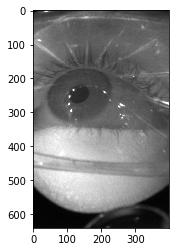

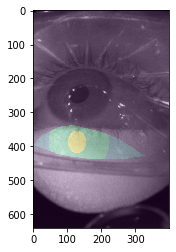

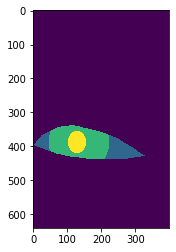

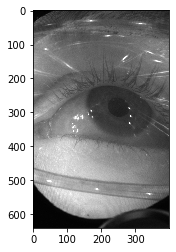

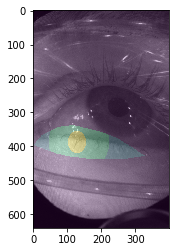

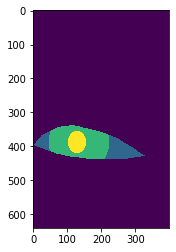

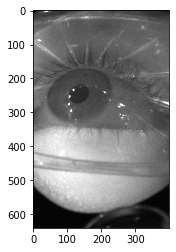

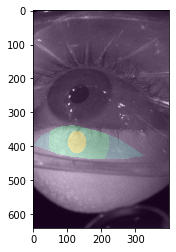

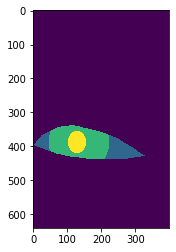

In [59]:
train_images_dir = DATASET_DIR + '/train/images'
train_labels_dir = DATASET_DIR + '/train/labels'

assert (len(os.listdir(train_images)) == len(os.listdir(train_labels))) # 8916

images = sorted(os.listdir(train_images))
labels = sorted(os.listdir(train_labels))
print(len(images))

count = 0
for i in range(len(images)):
    print(images[i])
    print(labels[i])
    image = load_img(train_images+'/'+images[i])
    label = np.load(train_labels+'/'+labels[i])
    plt.figure()
    plt.imshow(image)
    plt.savefig('/home/jjonathanmak/cs271proj/image1.png')
    plt.figure()
    
    plt.imshow(image)
    plt.imshow(label, alpha=0.3)
    
    plt.figure()
 
    plt.imshow(label)
    plt.savefig('/home/jjonathanmak/cs271proj/label1.png')
    count += 1
    if count == 3: break

In [56]:
def load_data(IMAGE_DIR, LABEL_DIR):

    images = []
    labels = []
    image_list = sorted(os.listdir(IMAGE_DIR))
    label_list = sorted(os.listdir(LABEL_DIR))

    for file in tqdm(range(len(image_list))):

        image_path = IMAGE_DIR +'/'+image_list[i]
        label_path = LABEL_DIR +'/'+label_list[i]
        
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        label = np.load(label_path)
       
        images.append(img)
        labels.append(label)


    return np.array(images), np.array(labels)

train_images, train_labels = load_data(TRAIN_IMAGE_DIR, TRAIN_LABELS_DIR)
val_images, val_labels = load_data(VAL_IMAGE_DIR, VAL_LABELS_DIR)
# test_images, test_masks = load_data(TEST_IMAGE_DIR, TEST_LABELS_DIR)

print('Train images: ', train_images.shape)
print('Train labels: ', train_labels.shape)
print('Val images: ', val_images.shape)
print('Val labels: ', val_labels.shape)

# print('Test masks: ', test_masks.shape)

100%|██████████| 2403/2403 [00:08<00:00, 270.88it/s]


Train images:  (8916, 640, 400, 3)
Train labels:  (8916, 640, 400)
Val images:  (2403, 640, 400)
Val labels:  (2403, 640, 400)


In [60]:
BATCH_SIZE = 16

train_dataset = tf.data.Dataset.from_tensor_slices((train_images[:7132], train_labels[:7132])).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((train_images[7132:], train_labels[7132:])).batch(BATCH_SIZE)

In [68]:
# Train
model = eye_segmentation.train_mrcnn(train_dataset, val_dataset, load_last=False)

TypeError: train() takes 3 positional arguments but 4 were given